In [1]:
from tensorflow.keras import datasets
from keras.utils import np_utils
#데이터 준비
(X_train, y_train), (X_test, y_test)=datasets.mnist.load_data()
print(y_train[:5])
# one hot encoding
y_train=np_utils.to_categorical(y_train)
print(y_train[:5])
y_test=np_utils.to_categorical(y_test)
L,W,H=X_train.shape
# -1 샘플의 개수
X_train=X_train.reshape(-1, W*H)
X_test=X_test.reshape(-1, W*H)
X_train=X_train/255.0
X_test=X_test/255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
from keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
# 분류 DNN 모델 구현 함수
def make_model(input_number, layers, output_number):
    model=Sequential() # 모델 초기화
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,), name='Hidden-1')) # 입력층
    model.add(Dense(layers[1], activation='relu', name='Hidden-2')) # 첫번째 은닉층
    model.add(Dense(layers[2], activation='relu', name='Hidden-3')) # 두번째 은닉층
    model.add(Dropout(0.2)) # 드랍아웃 계층 - Dropout(p) : p의 확률로 출력 노드의 신호를 보내다 말다 함
                            #                             과적합 방지
    model.add(Dense(output_number, activation='softmax', name='output')) # 출력층
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [3]:
input_number=784 # 28*28
hidden_layers=[128,64,32] # 은닉계층 3개, 은닉 노드수 128개, 64개, 32개
print(hidden_layers)
number_of_class=10
output_number=number_of_class
model=make_model(input_number, hidden_layers, output_number) # 모델 생성

[128, 64, 32]


In [4]:
# 모델 학습
hist=model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 3s 4ms/step - loss: 0.4771 - accuracy: 0.8595 - val_loss: 0.1923 - val_accuracy: 0.9445
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 0.1861 - accuracy: 0.9476 - val_loss: 0.1243 - val_accuracy: 0.9641
Epoch 3/50
480/480 [==============================] - 2s 4ms/step - loss: 0.1309 - accuracy: 0.9628 - val_loss: 0.1151 - val_accuracy: 0.9648
Epoch 4/50
480/480 [==============================] - 2s 4ms/step - loss: 0.1004 - accuracy: 0.9708 - val_loss: 0.1012 - val_accuracy: 0.9701
Epoch 5/50
480/480 [==============================] - 2s 4ms/step - loss: 0.0798 - accuracy: 0.9766 - val_loss: 0.0978 - val_accuracy: 0.9716
Epoch 6/50
480/480 [==============================] - 2s 4ms/step - loss: 0.0649 - accuracy: 0.9811 - val_loss: 0.0995 - val_accuracy: 0.9707
Epoch 7/50
480/480 [==============================] - 2s 4ms/step - loss: 0.0561 - accuracy: 0.9839 - val_loss: 0.0923 - val_accuracy: 0.9737
Epoch 

In [5]:
# 모델 평가
performance_test=model.evaluate(X_test,y_test,batch_size=100)
print('Loss, Accuracy :', performance_test)

100/100 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9795
Loss, Accuracy : [0.15744329988956451, 0.9794999957084656]


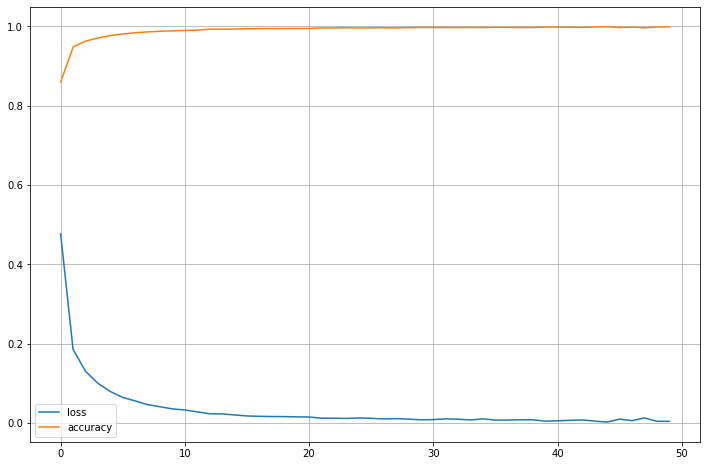

In [7]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 128)               100480    
                                                                 
 Hidden-2 (Dense)            (None, 64)                8256      
                                                                 
 Hidden-3 (Dense)            (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
